In [1]:
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(X_train[0])
X_train.shape

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

(60000, 28, 28)

In [4]:
print(X_test[0])
X_test.shape

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

(10000, 28, 28)

In [5]:
print(y_train[0])
y_train.shape

5


(60000,)

In [6]:
print(y_test[0])
y_test.shape

7


(10000,)

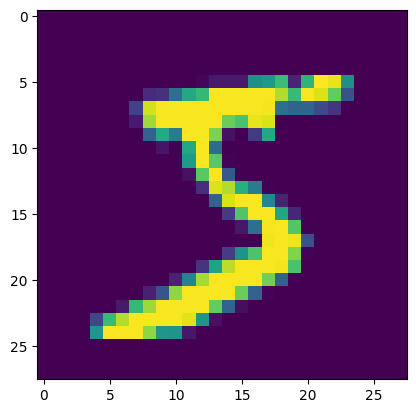

In [7]:
plt.imshow(X_train[0])

In [10]:
def print_random_image(arr, arr2):
  index = random.randint(0, len(arr)-1)
  plt.imshow(arr[index])
  plt.title(f"Image Class : {arr2[index]}")
  plt.show()

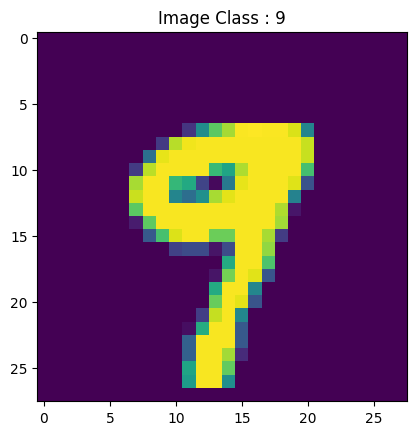

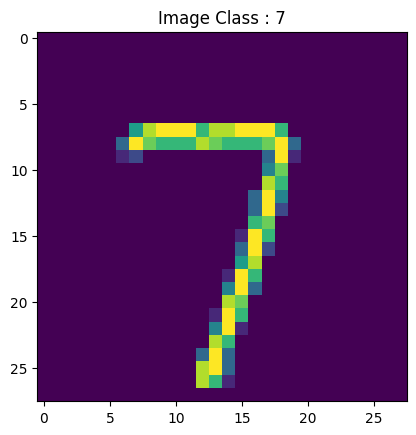

In [14]:
print_random_image(X_train, y_train)
print_random_image(X_test, y_test)

In [ ]:
nsamples, nx, ny = X_train.shape
X_train_reshaped = X_train.reshape((nsamples,nx*ny))

In [ ]:
X_train_reshaped.shape

(60000, 784)

In [ ]:
nsamples, nx, ny = X_test.shape
X_test_reshaped = X_test.reshape((nsamples,nx*ny))

In [ ]:
# Dictionary for storing model's accuracy
model_accuracy = {}

In [ ]:
# Setting Random State for tensorflow and sklearn
random_state = 42
tf.random.set_seed(42)

# Model 0 : Default Logistic Regression Classifier

In [ ]:
model_0 = LogisticRegression()
model_0.fit(X_train_reshaped, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
preds = model_0.predict(X_test_reshaped)
accuracy_model_0 = accuracy_score(y_test, preds)
print(f"Model_0 accuracy : {accuracy_model_0}")

Model_0 accuracy : 0.9255


In [ ]:
model_accuracy['model_0_accuracy'] = accuracy_model_0

# Model 1 : Hyperparameter tuning using GridSearchCV

In [ ]:
param_grid = {
    'solver' : ['sag', 'saga', 'lbfgs']
}
model_1 = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
model_1.fit(X_train_reshaped, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
best_params = model_1.best_params_
best_estimator = model_1.best_estimator_

In [ ]:
preds = best_estimator.predict(X_test_reshaped)
accuracy_model_1 = accuracy_score(y_test, preds)

In [ ]:
model_accuracy['model_1_accuracy'] = accuracy_model_1

# Model 2 : Base Neural Network Classification Model

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9730 - accuracy: 0.4141 - val_loss: 1.2407 - val_accuracy: 0.5057
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0737 - accuracy: 0.5701 - val_loss: 0.9447 - val_accuracy: 0.6196
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8656 - accuracy: 0.6795 - val_loss: 0.7787 - val_accuracy: 0.7377
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7542 - accuracy: 0.7386 - val_loss: 0.7289 - val_accuracy: 0.7516
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7194 - accuracy: 0.7497 - val_loss: 0.7336 - val_accuracy: 0.7523
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6930 - accuracy: 0.7576 - val_loss: 0.6801 - val_accuracy: 0.7692
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6696 - accuracy: 0.7693 - val_loss: 0.6821 - val_accurac

In [ ]:
loss, accuracy_model_2 = model_2.evaluate(X_test, y_test)
loss, accuracy_model_2

313/313 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.8316


(0.5537883639335632, 0.83160001039505)

In [ ]:
model_accuracy['model_2_accuracy'] = accuracy_model_2

In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
# Normalization
X_train = X_train/255.0
X_test = X_test/255.0

# Getting the Best Learning Rate using Callback

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model_2.fit(X_train,
            y_train,
            epochs=100,
            validation_data=(X_test, y_test),
            callbacks=[lr_scheduler])

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5125 - accuracy: 0.8560 - val_loss: 0.3194 - val_accuracy: 0.9104 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3066 - accuracy: 0.9118 - val_loss: 0.2930 - val_accuracy: 0.9170 - lr: 0.0011
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.9192 - val_loss: 0.2733 - val_accuracy: 0.9203 - lr: 0.0013
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2695 - accuracy: 0.9220 - val_loss: 0.2789 - val_accuracy: 0.9208 - lr: 0.0014
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2598 - accuracy: 0.9256 - val_loss: 0.2770 - val_accuracy: 0.9234 - lr: 0.0016
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2539 - accuracy: 0.9272 - val_loss: 0.2651 - val_accuracy: 0.9233 - lr: 0.0018
Epoch 7/100
1875/1875 [=============================

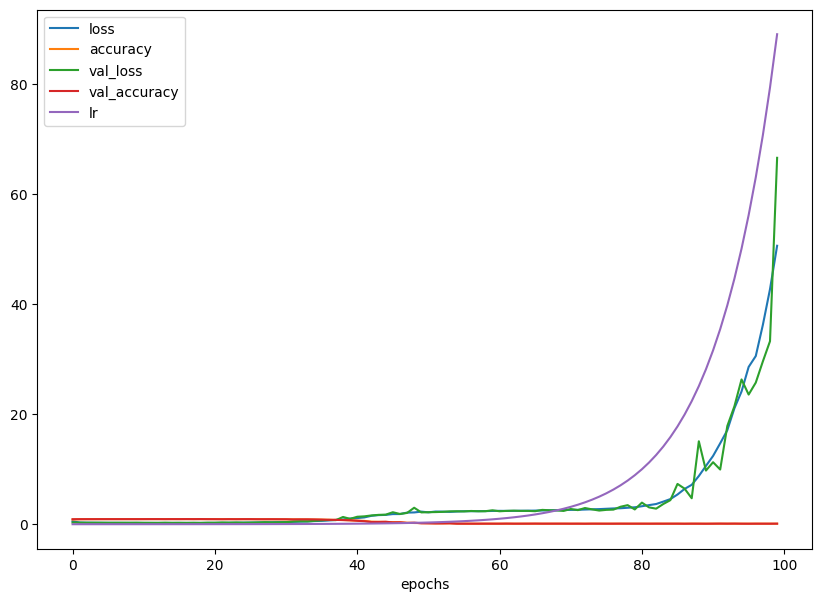

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

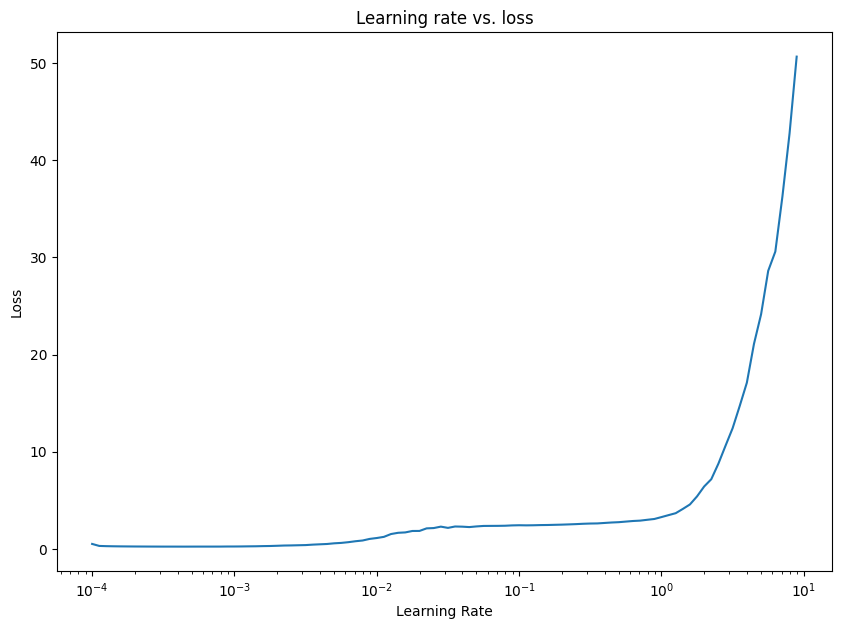

In [ ]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

# Model 3 : CNN  

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])
model_3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2656 - accuracy: 0.9161 - val_loss: 0.1055 - val_accuracy: 0.9665
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0947 - accuracy: 0.9710 - val_loss: 0.0923 - val_accuracy: 0.9711
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0720 - accuracy: 0.9779 - val_loss: 0.0542 - val_accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0592 - accuracy: 0.9820 - val_loss: 0.0504 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0456 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0389 - val_accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0539 - val_accuracy

In [ ]:
loss_3, accuracy_model_3 = model_3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 0.9897


In [ ]:
model_accuracy['model_3_accuracy'] = accuracy_model_3

# Classification Matrix

In [ ]:
preds = model_3.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
preds = [class_names[np.argmax(x)] for x in preds]
preds

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 5,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [ ]:
precision = precision_score(y_test, preds, average='weighted')
print(f'Precision: {precision:.2f}')
f1 = f1_score(y_test, preds, average='weighted')
print(f'F1 Score: {f1:.2f}')

Precision: 0.99
F1 Score: 0.99


In [ ]:
cm = confusion_matrix(y_test, preds)
cm

array([[ 968,    0,    1,    0,    2,    1,    5,    2,    0,    1],
       [   0, 1130,    3,    0,    1,    0,    1,    0,    0,    0],
       [   2,    2, 1020,    0,    1,    0,    0,    5,    2,    0],
       [   0,    0,    0, 1002,    0,    5,    0,    1,    0,    2],
       [   0,    0,    0,    0,  977,    0,    1,    0,    0,    4],
       [   0,    0,    0,    3,    0,  888,    1,    0,    0,    0],
       [   2,    2,    1,    0,    3,    2,  946,    0,    2,    0],
       [   0,    2,    9,    2,    0,    0,    0, 1013,    0,    2],
       [   1,    0,    0,    2,    0,    1,    0,    2,  967,    1],
       [   1,    1,    1,    0,    5,    6,    1,    6,    2,  986]])

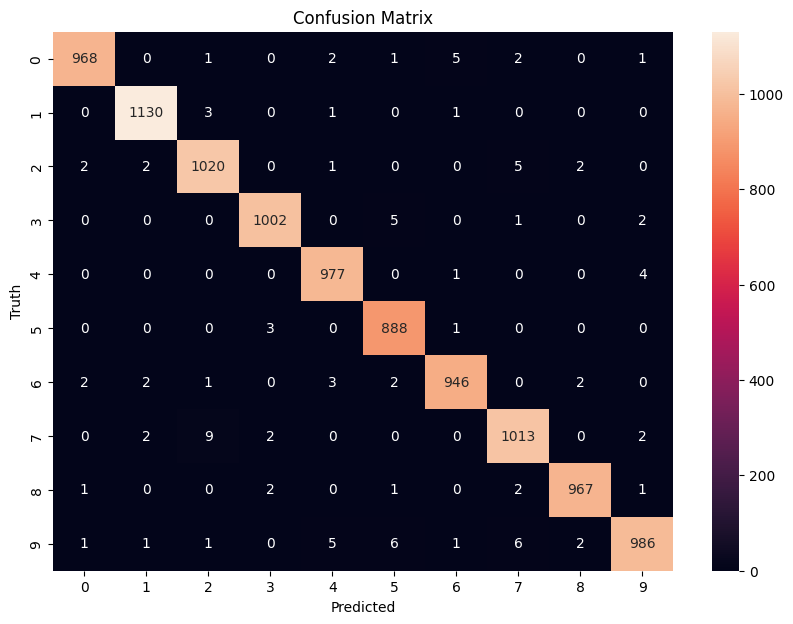

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth');

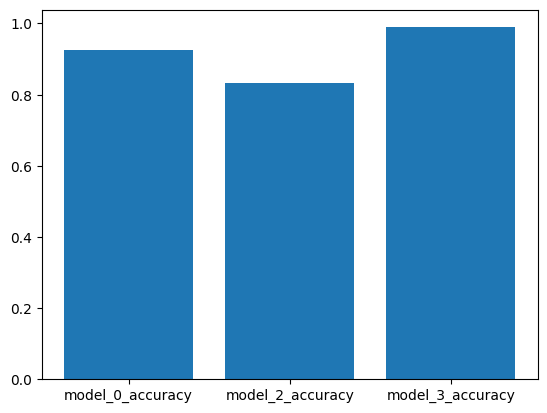

In [ ]:
model_names = list(model_accuracy.keys())
accuracies = [model_accuracy[name] for name in model_names]

plt.bar(model_names, accuracies)
plt.xticks(range(len(model_names)), model_names)
plt.show()